# Assignment 4: Mid Point Review

Congratulations, you have reached the midpoint of the course! The rest of the course will be focused on more advanced state of the art machine learning techniques. However, before we dive into that, this assignment will be focused on ensuring you understand all the core concepts that have been covered so far. Keep in mind, these are questions that can be asked during machine learning internship interviews, so do make sure you understand them if you want to dive into this industry!

### 1) Linear vs Polynomial Regression
- Describe both Linear Regression and Polynomial Regression (3 lines or less each).

- Describe overfitting vs underfitting with respect to parameters.  


## YOUR ANSWER HERE - YOUR MAY USE MARKDOWN, LATEX, CODE, DIAGRAMS, ETC
Machine learning, more specifically the field of predictive modeling, is primarily concerned with minimizing the error of a model or making the most accurate predictions possible.

Linear regression is a linear approach to modelling the relationship between a dependent variable and one or more independent variables. In machine learning, we use linear regression to understand the relationship between input and output values as well as predicting the dependent variable y depending on the independant variable x. We are trying to minimize the error between the predicted value and the actual value. The objective of a linear regression model is to find a relationship between one or more features(independent variables) and a continuous target variable(dependent variable).

Polynomial regression allows to fit nonlinear data. It uses polynomial degrees to model the relationship between a dependant variable and one or more independant variable. Although this model allows for a nonlinear relationship between X and Y, polynomial regression is still considered linear regression since it is linear in the regression coefficients (weights).

Overfitting: The model adaptes to the training set and learns all the noise of the data. It has memorized the data. The model is overfitting your training data when you see that the model performs well on the training data but does not perform well on the evaluation data. This is because the model is memorizing the data it has seen and is unable to generalize to unseen examples.

Underfitting: Our model is not powerful enough (degree) to fit the training data. This is because the model is unable to capture the relationship between the input values and the target values. 


### 2) Logistic Regression vs. Linear SVM
- Describe how logistic regression works (3 lines or less)
- Describe how linear SVM works. Mention the role(s) of:
    - support vectors
    - margin
    - slack variables
    - kernels
- Plot an example for SVM where the linear kernel is not enough to separate the data, but another kernel works

## YOUR ANSWER HERE - YOUR MAY USE MARKDOWN, LATEX, CODE, DIAGRAMS, ETC
Logistic regression is a type of supervised model for classification problems. It uses a logistic function which is also called sigmoid function. It’s an S-shaped curve that can take any real-valued number between 0 and 1, but never exactly at those limits. We use this function to classify inputs and class them in one of the two classes.

SVM: The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points. 

Our objective is to find a plane that has the ***maximum margin***, i.e the maximum distance between data points of both classes. Hyperplanes are decision boundaries that help classify the data points. Data points falling on either side of the hyperplane can be attributed to different classes. The dimension of the hyperplane depends upon the number of features. If the number of input features is 2, then the hyperplane is just a line. If the number of input features is 3, then the hyperplane becomes a two-dimensional plane. 
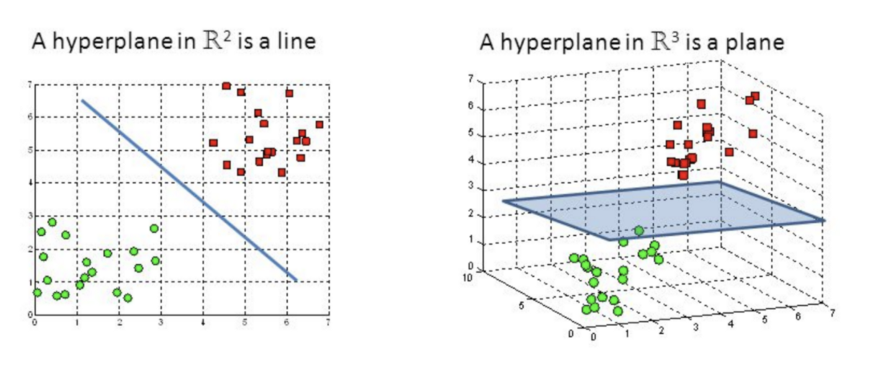

***Support vectors*** are data points that are closer to the hyperplane and influence the position and orientation of the hyperplane. Using these support vectors, we maximize the margin of the classifier. Deleting the support vectors will change the position of the hyperplane. These are the points that help us build our SVM.






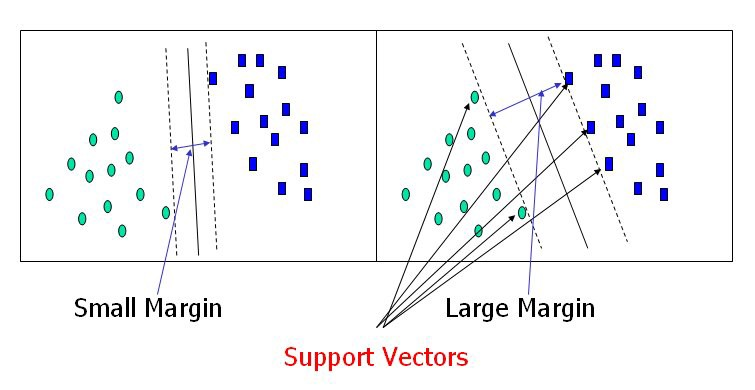
https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47


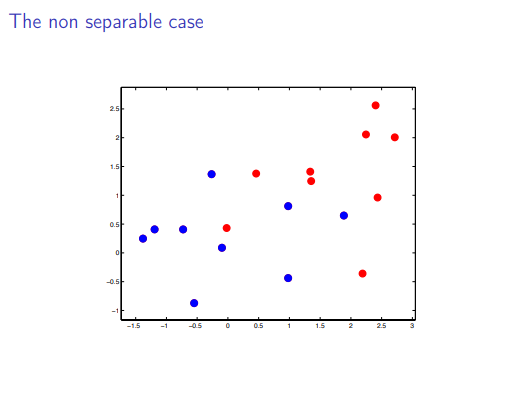

The standard SVM classifier works only if you have a LINEAR SEPERABLE.

In many cases that condition is not satisfied, but still the two classes are pretty much separated except some small training data where the two categories overlap. It wouldn’t be a huge error if we would draw a line (somewhere in between) and accept some level of error - having training data on the wrong side of the marginal hyperplanes. How do we measure the error? The answer is: **slack variables**. For each training data point we can define a variable that measures the distance of the point to its marginal hyperplane (dashed line in the figure), lets call it ξ. Whenever the point is on the wrong site of the marginal hyperplane we quantify the amount of error by the ratio between ξ and half of the margin, i.e. distance between separating hyperplane and marginal hyperplane (M in the figure). Points on the correct site are not quantified as errors. 




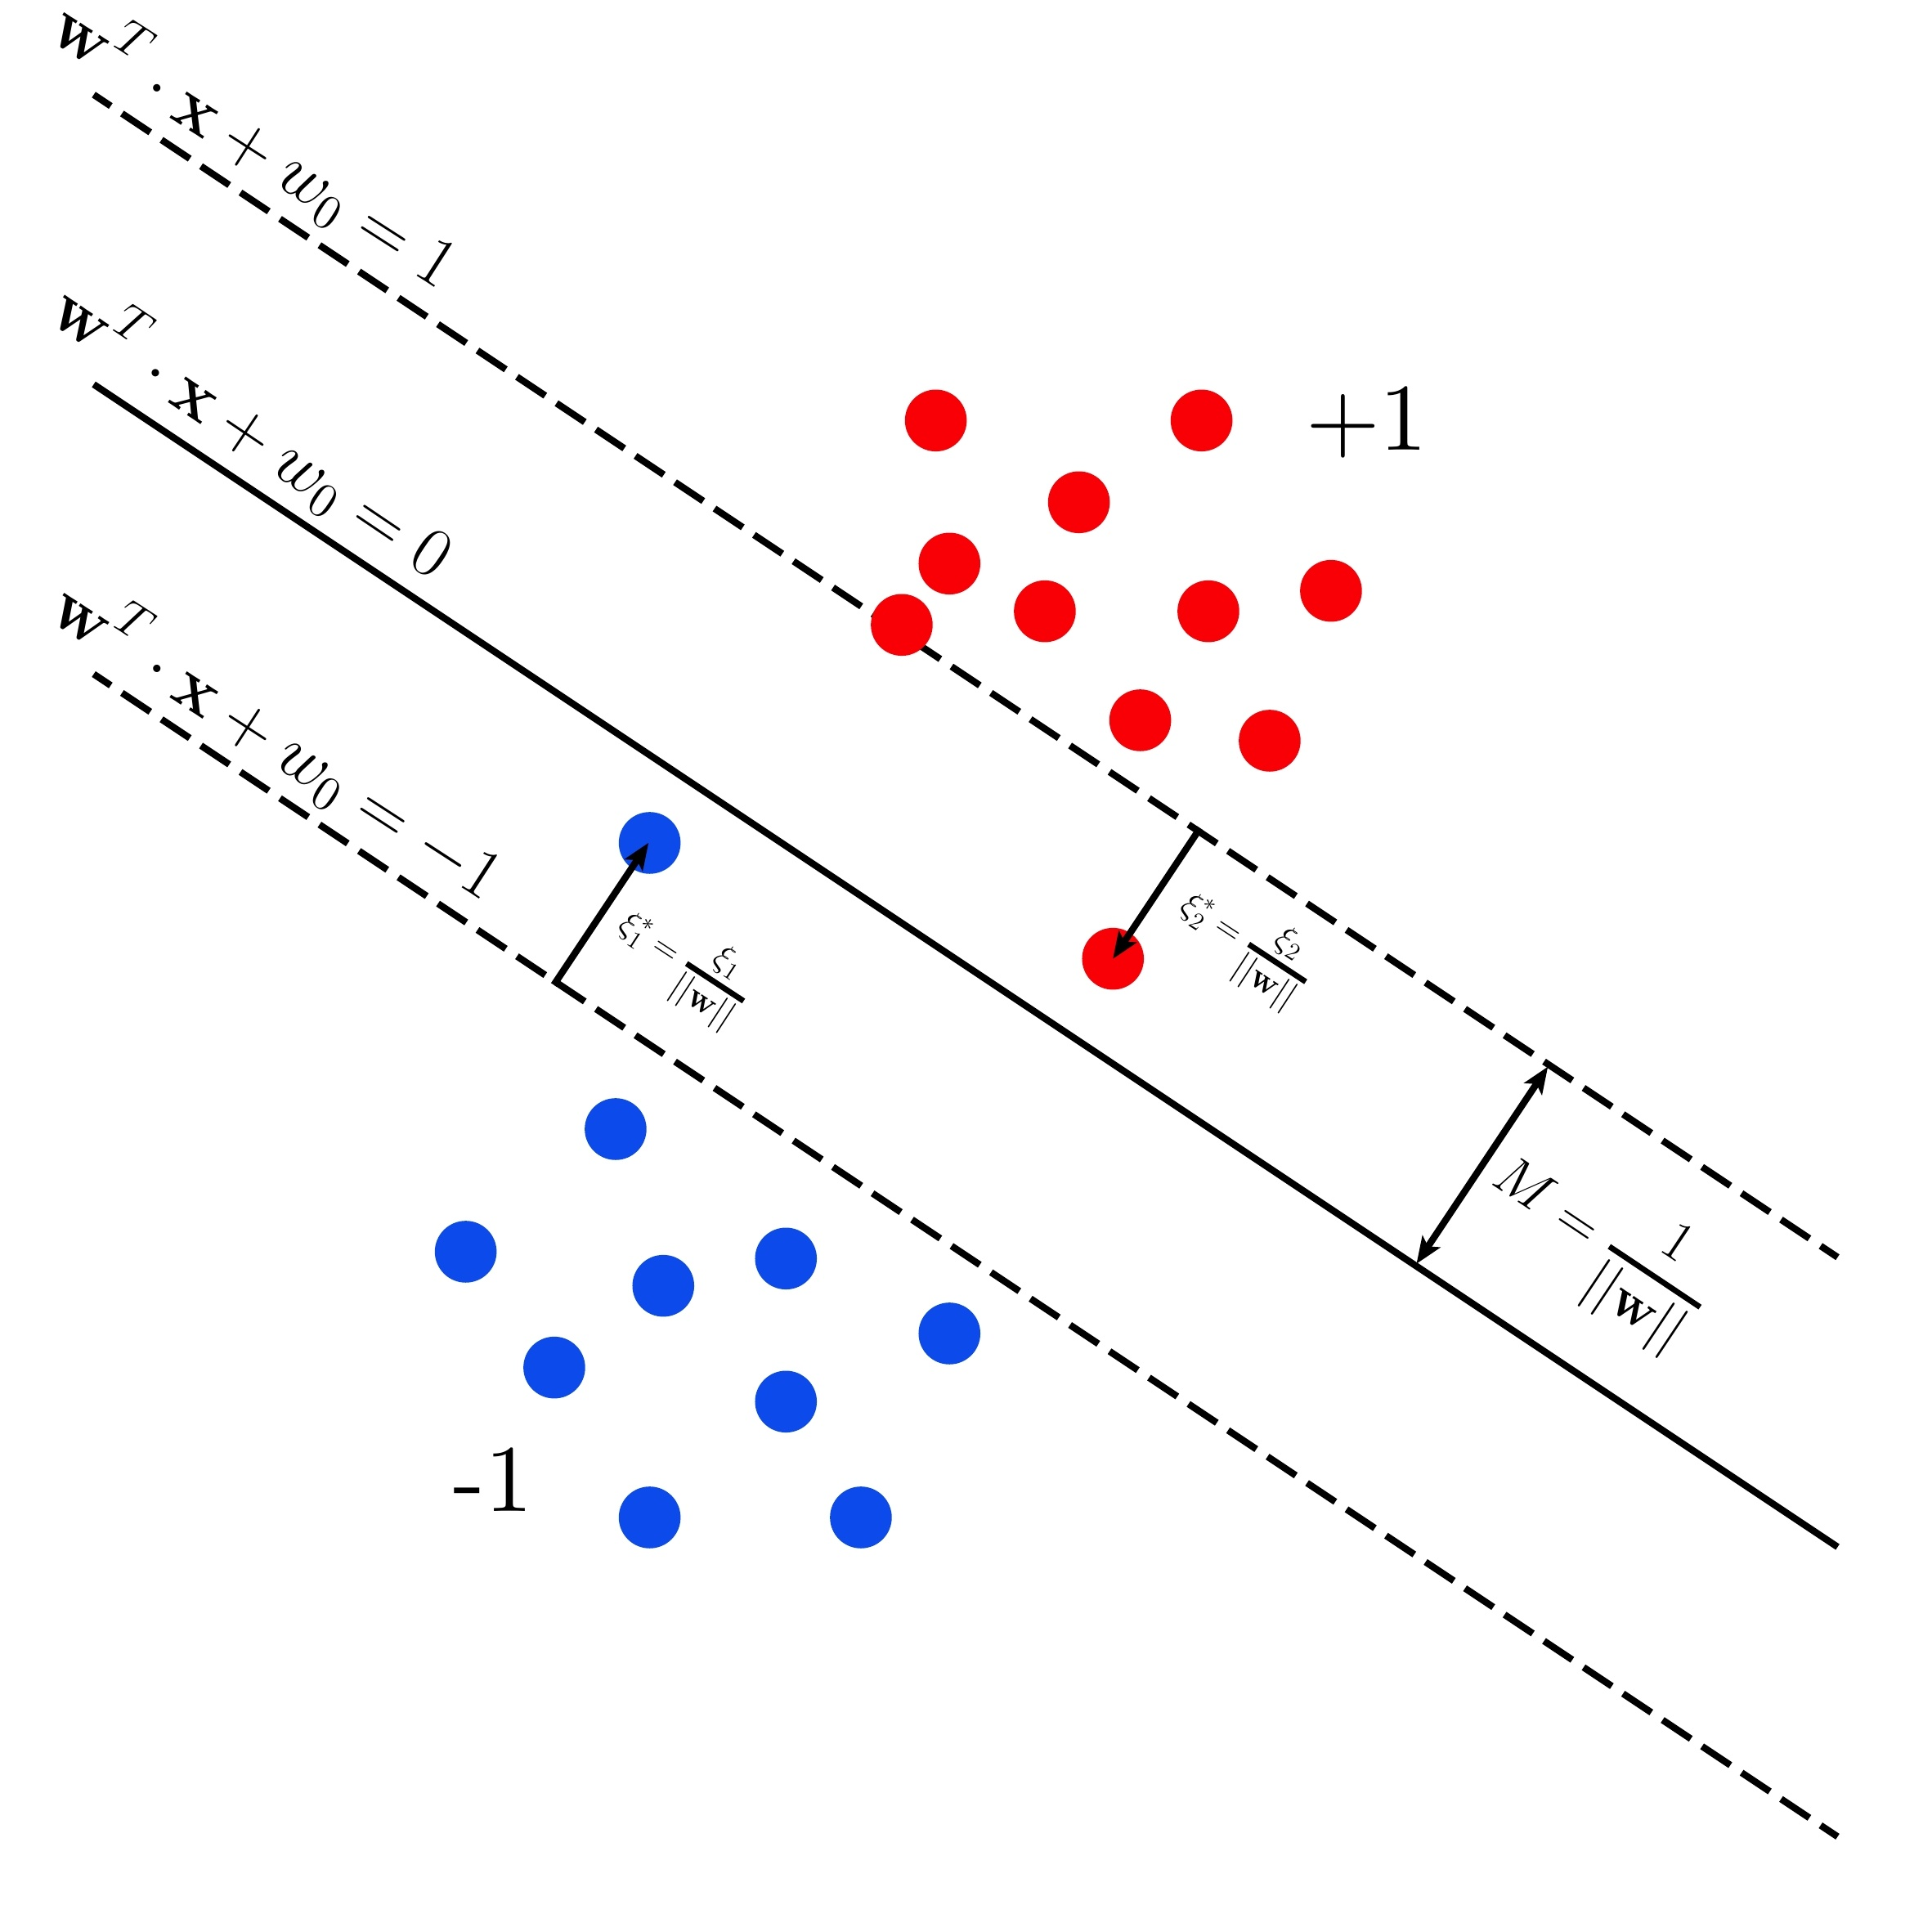
https://www.quora.com/What-is-the-purpose-for-using-slack-variable-in-SVM

Kernel: a function that maps the data to a higher dimension where the data is separable

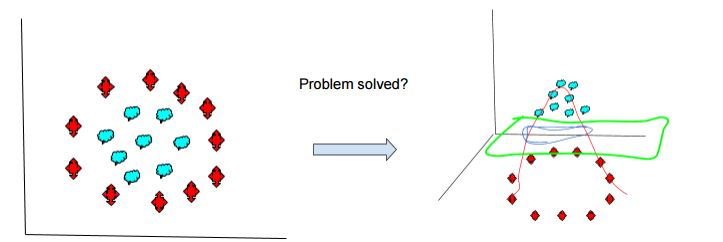

https://codingmachinelearning.wordpress.com/2016/07/25/support-vector-machines-kernel-explained/

### 3) Linear SVM vs k-NN
- K-Nearest Neighbours is a popular unsupervised learning algorithm. Explain the difference between supervised and unsupervised learning?
- K-NN is an example of a lazy learning algorithm. Why is it called so. What could be a use case? Justify using a lazy learning algorithm in that case.
- Outline the main steps for the KNN algorithm. Use text, code, plots, diagrams, etc as necessary.  
- Plot a example dataset which works in an SVM classification and not k-NN classification. Repeat for the reverse scenario.

## YOUR ANSWER HERE - YOUR MAY USE MARKDOWN, LATEX, CODE, DIAGRAMS, ETC
**Supervised vs Unsupervised learning**

Supervised learning is where you have input variables (x) and an output variable (Y) and you use an algorithm to learn the mapping function from the input to the output.The goal is to approximate the mapping function so well that when you have new input data (x) that you can predict the output variables (Y) for that data.
It is called supervised learning because the process of an algorithm learning from the training dataset can be thought of as a teacher supervising the learning process. We know the correct answers, the algorithm iteratively makes predictions on the training data and is corrected by the teacher. Learning stops when the algorithm achieves an acceptable level of performance

Supervised learning problems can be further grouped into regression and classification problems:
Classification: A classification problem is when the output variable is a category, such as “red” or “blue” or “disease” and “no disease”.
Regression: A regression problem is when the output variable is continuous, such as “dollars” or “weight”.

Unsupervised learning is where you only have input data (X) and no corresponding output variables.The goal for unsupervised learning is to learn patterns in the data in order to learn more about the data. Unlike supervised learning, there is no correct answer. Algorithms are left to their own devises to discover and present the interesting structure in the data.

Unsupervised learning problems can be further grouped into clustering and association problems.

Clustering: A clustering problem is where you want to discover the inherent groupings in the data, such as grouping customers by purchasing behavior.
Association:  An association rule learning problem is where you want to discover rules that describe large portions of your data, such as people that buy X also tend to buy Y.

**Lazy Learning Algorithm**
K-NN is a lazy learner because it doesn’t learn anything from the training data but “memorizes” the training dataset instead.
Lazy learners simply store the training data and wait until a testing data appear. When it does, classification is conducted based on the most related data in the stored training data.

KNN could and probably should be one of the first choices for a classification study when there is little or no prior knowledge about the distribution data i.e. Credit ratings — collecting financial characteristics vs. comparing people with similar financial features to a database. By the very nature of a credit rating, people who have similar financial details would be given similar credit ratings. Therefore, they would like to be able to use this existing database to predict a new customer’s credit rating, without having to perform all the calculations.

KNN algorithm:
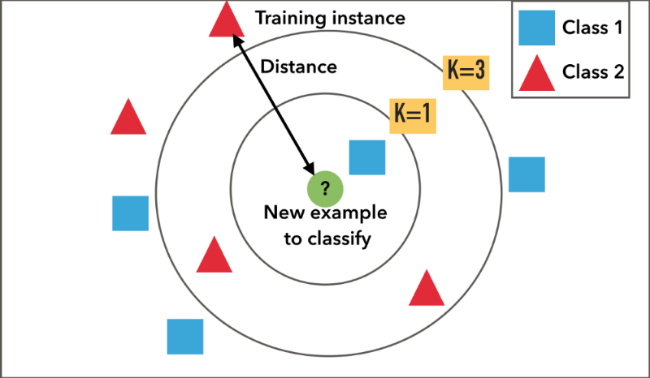
Example of k-NN classification. The test sample (inside circle) should be classified either to the first class of blue squares or to the second class of red triangles. If k = 3 (outside circle) it is assigned to the second class because there are 2 triangles and only 1 square inside the inner circle. If, for example k = 5 it is assigned to the first class (3 squares vs. 2 triangles outside the outer circle). An object is classified by a majority vote of its neighbors


Lecture about SVM: https://youtu.be/_PwhiWxHK8o

### 4) K-NN Implementation
- Implement the K-NN algorithm by hand (ie. Don't use the sklearn implementation).

K-NN theory
    
https://towardsdatascience.com/introduction-to-k-nearest-neighbors-3b534bb11d26
    

https://www.analyticsvidhya.com/blog/2018/03/introduction-k-neighbours-algorithm-clustering/

ABOUT K-NN
At its most basic level, it is essentially classification by finding the most similar data points in the training data, and making an educated guess based on their classifications. This method has seen wide application in many domains, such as in recommendation systems, semantic searching, and anomaly detection. As we would need to in any machine learning problem, we must first find a way to represent data points as feature vectors.**A feature vector is our mathematical representation of data, and since the desired characteristics of our data may not be inherently numerical, preprocessing and feature-engineering may be required in order to create these vectors.** Given data with N unique features, the feature vector would be a vector of length N, where entry I of the vector represents that data point’s value for feature I. Each feature vector can thus be thought of as a point in R^N. Now, unlike most other methods of classification, kNN falls under lazy learning, which means that there is no explicit training phase before classification. This does mean that we can immediately begin classifying once we have our data. However this means that we must be able to keep the entire training set in memory unless we apply some type of reduction to the data-set, and performing classifications can be computationally expensive as the algorithm parse through all data points for each classification. For these reasons, kNN tends to work best on smaller data-sets that do not have many features.

Once we have formed our training data-set, which is represented as an M x N matrix where M is the number of data points and N is the number of features, we can now begin classifying. The gist of the kNN method is, for each classification query, to:

1. Compute a distance value between the item to be classified and every item in the training data-set
2. Pick the k closest data points (the items with the k lowest distances)
3. Conduct a “majority vote” among those data points — the dominating classification in that pool is decided as the final classification

There are two important decisions that must be made before making classifications. One is the value of k that will be used; this can either be decided arbitrarily, or you can try cross-validation to find an optimal value. The next, and the most complex, is the distance metric that will be used. There are many different ways to compute distance, as it is a fairly ambiguous notion, and the proper metric to use is always going to be determined by the data-set and the classification task. Two popular ones, however, are Euclidean distance and Cosine similarity.

Euclidean distance is probably the one that you are most familiar with; it is essentially the magnitude of the vector obtained by subtracting the training data point from the point to be classified:

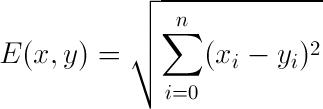

Another common metric is Cosine similarity. Rather than calculating a magnitude, Cosine similarity instead uses the difference in direction between two vectors:

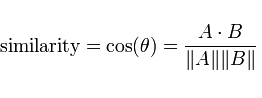
Choosing a metric can often be tricky, and it may be best to just use cross-validation to decide, unless you have some prior insight that clearly leads to using one over the other. For example, for something like word vectors, you may want to use Cosine similarity because the direction of a word is more meaningful than the sizes of the component values. Generally, both of these methods will run in roughly the same time, and will suffer from highly-dimensional data.

After doing all of the above and deciding on a metric, the result of the kNN algorithm is a decision boundary that partitions R^N into sections. Each section (colored distinctly below) represents a class in the classification problem. The boundaries need not be formed with actual training examples — they are instead calculated using the distance metric and the available training points. By taking R^N in (small) chunks, we can calculate the most likely class for a hypothetical data-point in that region, and we thus color that chunk as being in the region for that class.

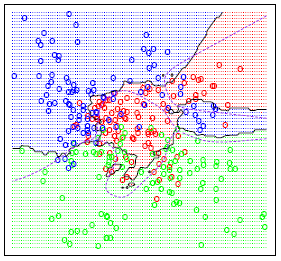


In [70]:
# Implement kNN by hand. It might be useful to store all distances in one array/list


import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import operator
import math
%matplotlib inline


# loading dataset
iris = load_iris()
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

# Preview dataset
iris_df.head()


# #splitting data in two arrays 
# feature_columns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']
# X = iris_df[feature_columns]
# y = iris_df['target']
#Split train/test data
# trainingset, testInstance = train_test_split(X, train_size = 0.5, test_size = 0.5, random_state = 0)
# , y_train, y_test
## YOUR CODE HERE
def euclideanDistance(data1, data2, length):
    distance = 0
    for x in range(length):
        distance += np.square(data1[x] - data2[x])
    return np.sqrt(distance)

def knn(trainingSet, testInstance, k):
 
    distances = {}
    sort = {} 
    length = testInstance.shape[1]
    # Step 1: Calculating euclidean distance between each row of training data and test data
    for x in range(len(trainingSet)):
        dist = euclideanDistance(testInstance, trainingSet.iloc[x], length)

        distances[x] = dist[0]
       
    # Step 2: Sorting them on the basis of distance
    sorted_d = sorted(distances.items(), key=operator.itemgetter(1))
 
    neighbors = []
    

    # Step 3: Extracting top k neighbors
    for x in range(k):
        neighbors.append(sorted_d[x][0])
  
    classVotes = {}
    
    # Step 4: Calculating the most freq class in the neighbors
    for x in range(len(neighbors)):
        response = trainingSet.iloc[neighbors[x]][-1]
 
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    
    # Step 5 : Use simple majority of the category of nearest neighbors as the prediction label of the query instance
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return(sortedVotes[0][0], neighbors)
    
    
# iris_df.head()

testSet = [[7.2, 3.6, 5.1, 2.5]]
test = pd.DataFrame(testSet)

k = 1 

result, neigh = knn(iris_df,test,k)

print(result)



# STEP 1: Choose the number K of neighbors to be considered  
# STEP 2: Calculate the distance (Euclidean is the most popular implementation to work by hand) between the query instance and all the training samples
# STEP 3: Sort the distance and determine nearest neighbors based on the k-th minimum distance
# STEP 4: Gather the category/class labels of the k nearest neighbors.
# STEP 5: Use simple majority of the category of nearest neighbors as the prediction label of the query instance

<class 'pandas.core.frame.DataFrame'>


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


### 5) Ensemble Methods
- Explain bagging and boosting. Clearly illustrate the difference between these methods. When would you use either one?
- What is a decision tree? What is a random forest? Compare them and list 3 pros and cons of each?



## YOUR ANSWER HERE - YOUR MAY USE MARKDOWN, LATEX, CODE, DIAGRAMS, ETC
**Bagging** is used when our goal is to reduce the variance of a decision tree. Here idea is to create several subsets of data from training sample chosen randomly with replacement. Now, each collection of subset data is used to train their decision trees. As a result, we end up with an ensemble of different models. Average of all the predictions from different trees are used which is more robust than a single decision tree

A **random tree** is an ensemble of Decision tree, in addition to taking the random subset of data, it also takes the random selection of features rather than using all features to grow trees.Instead of searching for the most important feature while splitting a node, it searches for the best feature among a random subset of features. This results in a wide diversity that generally results in a better model.

Algorithm: 
1. Suppose there are N observations and M features in training data set. First, a sample from training data set is taken randomly with replacement.

2. A subset of M features are selected randomly and whichever feature gives the best split is used to split the node iteratively.

3. The tree is grown to the largest.

4. Above steps are repeated and prediction is given based on the aggregation of predictions from n number of trees.

Avangtages: 
- Handles higher dimensionality data very well.
- Handles missing values and maintains accuracy for missing data.
- Can be used for both classification and regression problems
- Prevents overfitting most of the time, by creating random subsets of the features and building smaller trees using these subsets. Afterwards, it combines the subtrees.

Cons: 
- Since final prediction is based on the mean predictions from subset trees, it won’t give precise values for the regression model.
- The main limitation of Random Forest is that a large number of trees can make the algorithm to slow and ineffective for real-time predictions. In general, these algorithms are fast to train, but quite slow to create predictions once they are trained. 

**Boosting** is a machine learning algorithm primarily for reducing bias, and also variance in supervised learning. It's an algorithm that converts weak learners to strong ones. A 'weak' learner (classifer, predictor, etc) is just one which performs relatively poorly--its accuracy is above chance, but just barely. In contrast, a strong learner is a classifier that is arbitrarily well-correlated with the true classification.

Idea: given a weak learner, run it multiple times on (reweighted) training data, then let learned classifier class.

On each iteration t:

- weight each training example by how incorrectly it was classified
- Learn a hypothesis – ht
- A strength for this hypothesis – αt

**A decision tree**
A decision tree is a tree-shaped diagram that people use to determine a course of action or show a statistical probability. In a decision tree, each branch represents a possible decision, occurrence or reaction.

Advantages: 
- Can be used for both classification and regression problems
- The algorithm is simple to understand, interpret and visualize as the idea is mostly used in our daily lives.
- Effort required for Data preparation is minimal.
- Parameters that are non - linear can be handled by Decision Tree Algorithms.

Cons: 
- Trees tend to overfit quickly at the bottom. If you have few observations in last nodes, poor decision can be taken. In this situation, consider reducing the number of levels of your tree or using pruning.
- Trees can be unstable because small variations in the data might result in a completely different tree being generated.
- Not fit for continuous variables: While working with continuous numerical variables, decision tree looses information when it categorizes variables in different categories.
https://towardsdatascience.com/the-random-forest-algorithm-d457d499ffcd
https://towardsdatascience.com/decision-tree-ensembles-bagging-and-boosting-266a8ba60fd9

### 6) PCA vs Autoencoders
- Describe how PCA achieves dimensionality reduction. Outline the main steps of the algorithm
- What is the importance of eigenvectors and eigenvalues in the PCA algorithm above.
- When we compute the covariance matrix in PCA, we have to subtract the mean. Why do we do this?
- What is Autoencoder (compare it to PCA)? Why are autoencoders better in general.
- When is the reduced dimension of an encoder equivalent to that of a PCA

## YOUR ANSWER HERE - YOUR MAY USE MARKDOWN, LATEX, CODE, DIAGRAMS, ETC
Dimensionality reduction in data mining focuses on representing data with minimum number of dimensions such that its properties are not lost and hence reducing the underlying complexity in processing the data. Principal Component Analysis (PCA) is one of the prominent dimensionality reduction techniques. (unsupervised machine learning

1. PCA is an algorithm able to reduce the number of features by choosing the most important ones that still represent the entire dataset. PCA aims to find a linear subspace of dimension d lower than n such that the data points lie mainly on this linear subspace with the least squared method and attempts to maintain most of the variability of the data. PCA does not take information of classes into account, it just look at the variance of each feature (variable), and choose the ones that present high variance are more likely to have a good split between classes. **The algorithm use the concepts of variance matrix, covariance matrix, eigenvector and eigenvalues pairs to perform PCA, providing a set of eigenvectors and its respectively eigenvalues as a result.

Preprocessing
- Perform data preprocessing (mean normalization/feature scaling)
- First compute the mean of each feature, replace each feature with sommation of(each feature - each mean), if needed i.e. size of a house/number of bedrooms, scale features to have comparable values.
- PCA finds a lower dimension subset (2D to 1D or 3D to 2D) to apply least square error.
- We try to find a vector that specifies the direction of the line or two vectors in the 2D case to define the surface on which we project our data

PCA Algorithm:
1. Reduce data from n-dimensions to k-dimensions by computing the "covariance matrix" (see formulas in video)
2. Compute eigenvectors of the covariance matrix 
3. U,S,V = svd(sigma), we take the first k column from the matrix U (n x n) to get k-dimensions ->

x e IR^n -> z e IR^k
where x is the dataset in n dimensions and z is the same dataset in k-dimensions

4. z = (U^k)^T * x to get my vector z of k-dimension where x are examples from training set/validation set/testing set
https://www.youtube.com/watch?v=rng04VJxUt4 Andrew Ng

PCA can either minimize the distance to the linear subspace or maximize the distance from the projected point to the origin. (It's equivalent) 
It's easier to calculate the distance from the projected point to the origin.
(projection of the points vector on the linear subspace)
Therefore, PCA finds the best fitting line by maximizing the sum of the squared distances from the projected points to the origin.
https://www.youtube.com/watch?v=jPmV3j1dAv4

2. Projection onto linear subspace must maximize variance: the eigenvectors represents the new set of axes of the principal component space and the eigenvalues carry the information of quantity of variance that each eigenvector have. The eigenvalues are given by the sum of squared distance from the projected points to the origin of the line that the eigen value is on. So, in order to reduce the dimension of the dataset we are going to choose those eigenvectors that have more variance and discard those with less variance because features that have low variance make the classes look the same 

3. We use the mean of each feature (variable) to find the center of the data, therefore we can center the data in the origin of the graph. Shifting the data to the middle of the graph did not change how the data are positionned relative to each other. The normalization of each attribute consists of mean centering; subtracting each data value from its variable's measured mean.
https://www.youtube.com/watch?v=FgakZw6K1QQ

4. An autoencoder neural network is an unsupervised learning algorithm that applies backpropagation, setting the target values to be equal to the inputs. Desired outputs are compared to achieved system outputs, and then the systems are tuned by adjusting  weights to narrow the difference between the two as much as possible. The algorithm gets its name because the weights are updated backwards, from output towards input. PCA is restricted to linear maps only whereas autoencoders are not.

5. Encoder part will be equivalent to PCA if linear encoder, linear decoder, square error loss function with normalized inputs are used. A single layer auto encoder with linear transfer function is nearly equivalent to PCA, where nearly means that the W found by AE and PCA won't be the same--but the subspace spanned by the respective W's will. Note that the equivalence is obviusly valid only for autoencoders that have a bottleneck layer smaller than the input layer.
https://www.quora.com/How-is-a-linear-autoencoder-equal-to-PCA




### 7) Implementation

In the 1980's', Alex 'Sandy' Pentland came up with 'EigenFaces'. A novel way for facial classification using dimensionality reduction. We are going to try replicate the experiment in this question. We have loaded the face dataset for you below. Here's some steps for you: 

- Use PCA to reduce its dimensionality.
- Use any algorithm to train a classifier for the dataset. You may use sklearn or pytorch. (Refer to PCA demo notebook for hints)
- (Optional) Use autoencoders for the dimensionality reduction, compare results to PCA. Any comments/conculsions?


In [108]:
# loading the faces dataset
from sklearn.datasets import fetch_lfw_people

# uncomment below to load dataset(takes ~5 mins to load data)
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting) h and w tell the dimension of the picture 
n_samples, h, w = lfw_people.images.shape
print(n_samples)
print(h)
print(w)


# assigning features vectors
X = lfw_people.data
n_features = X.shape[1]
print(X.shape)

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]
#means that there is 7 different people.
#Target is used in supervised learning (what we are trying to predict)

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

print("Size of each vector: {0}".format(X[0].shape))
X = np.array([face.ravel() for face in X])


1288
50
37
(1288, 1850)
Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7
Size of each vector: (1850,)


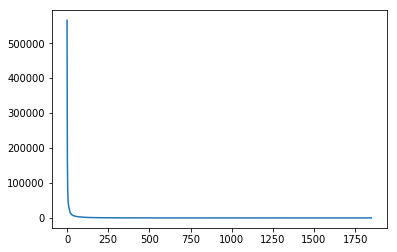

Shape of data after reconstruction: (1288, 1850)
Shape of data before PCA: (1288, 1850)
Shape of data after PCA: (1288, 30)


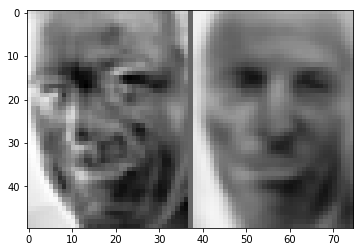

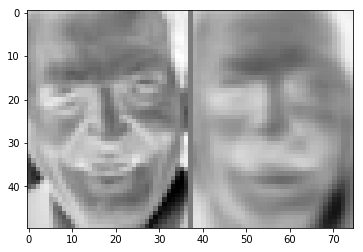

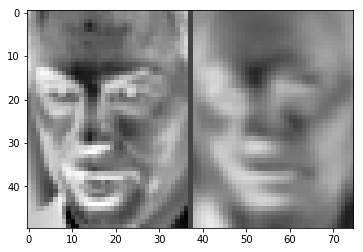

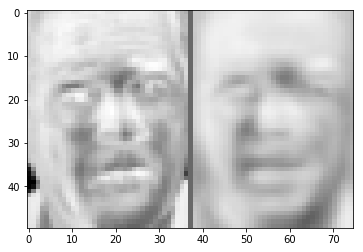

In [115]:
# plot an example image
#plt.imshow(X[2].reshape(h,w), cmap = 'gray')

### insert your code here ###
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 

#Creating a scalar object 
scaler = StandardScaler()


# #Step 1: Standarize data with a mean of 0 and a variance of 1
x = scaler.fit_transform(X)

# Step 2: Find eigenvalues/vectors of the centered covariance matrix 
# Note: Each image is a 2D grid of  50×37  pixels, but PCA operates on vectors. So, we will unravel each image into a vector of length  50⋅37=1850 .
X = np.array([data.ravel() for data in x])


X_average_row = np.average(X, axis=0)
X_bar = X - X_average_row
sigma = X_bar.T.dot(X_bar)

eigenvalues, _ = np.linalg.eig(sigma)

plt.plot(np.arange(len(eigenvalues)), eigenvalues)
plt.show()

#Step 3: Perform PCA to reduce its dimensionality.
pca = PCA(n_components=30)
principalComponents = pca.fit_transform(x)
X_reconstructed = pca.inverse_transform(principalComponents)
print("Shape of data after reconstruction: {0}".format(X_reconstructed.shape))
print("Shape of data before PCA: {0}".format(x.shape))
print("Shape of data after PCA: {0}".format(principalComponents.shape))

#Step 4: Compare to initial picture 
for i in np.random.choice(len(x), size=4):
    original = x[i].reshape(h, w)
    reconstructed = X_reconstructed[i].reshape(h, w)
    divider = np.ones((original.shape[0], 1))
    plt.imshow(np.concatenate((original, divider, reconstructed), axis=1), cmap='Greys')
    plt.show()


#Use any algorithm to train a classifier for the dataset. You may use sklearn or pytorch. (Refer to PCA demo notebook for hints)
#logistic regression ???

#(Optional) Use autoencoders for the dimensionality reduction, compare results to PCA. Any comments/conculsions?


## Bonus Challenge! (Optional)

This will take some time. However, trust that it is a rewarding experience. There will be a prize for whoever implements it correctly!

- Implement a feed forward neural network with back proprogation using stochastic gradient descent by hand. 
- Use any dataset you want and test the accuracy

In [60]:
### your code below ###

